In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("/content/drive/MyDrive/google.csv")
print("‘Number of rows and columns:’", df.shape)
df.head(5)

‘Number of rows and columns:’ (3145, 6)


,Date,Open,High,Low,Close,Volume
0,30-Jun-17,943.99,945.00,929.61,929.68,2287662
1,29-Jun-17,951.35,951.66,929.60,937.82,3206674
2,28-Jun-17,950.66,963.24,936.16,961.01,2745568
3,27-Jun-17,961.60,967.22,947.09,948.09,2443602
4,26-Jun-17,990.00,993.99,970.33,972.09,1517912


In [ ]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:1200, 1:2].values


In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [ ]:
X_train.shape

(740, 60, 1)

In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 12s 123ms/step - loss: 0.0342
Epoch 2/100
24/24 [==============================] - 3s 123ms/step - loss: 0.0059
Epoch 3/100
24/24 [==============================] - 3s 122ms/step - loss: 0.0049
Epoch 4/100
24/24 [==============================] - 3s 123ms/step - loss: 0.0043
Epoch 5/100
24/24 [==============================] - 3s 124ms/step - loss: 0.0043
Epoch 6/100
24/24 [==============================] - 3s 125ms/step - loss: 0.0043
Epoch 7/100
24/24 [==============================] - 3s 126ms/step - loss: 0.0039
Epoch 8/100
24/24 [==============================] - 3s 124ms/step - loss: 0.0041
Epoch 9/100
24/24 [==============================] - 3s 122ms/step - loss: 0.0055
Epoch 10/100
24/24 [==============================] - 3s 124ms/step - loss: 0.0040
Epoch 11/100
24/24 [==============================] - 3s 123ms/step - loss: 0.0043
Epoch 12/100
24/24 [==============================] - 3s 124ms/step - loss: 0.0038
Epoch 13/100

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:1200, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 460):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(400, 60, 1)


In [ ]:
dataset_test.shape

(400, 1)

In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

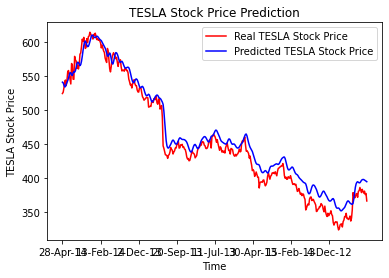

In [ ]:
# Visualising the results
plt.plot(df.loc[801:1200, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[801:1200, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,400,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

# Pytorch

In [ ]:

import numpy as np
import pandas as pd
df = pd.read_csv('/content/sample_data/SBUX.csv', index_col = 'Date', parse_dates=True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-11,86.260002,86.870003,85.849998,86.589996,82.458725,4921900
2019-12-12,88.000000,88.889999,87.540001,88.209999,84.001450,10282100
2019-12-13,88.019997,88.790001,87.580002,88.669998,84.439499,6714100
2019-12-16,89.139999,89.300003,88.430000,88.779999,84.544258,6705600
2019-12-17,88.870003,88.970001,87.470001,88.129997,83.925270,7296900


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, 5:6] 

In [ ]:
X.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2019-12-11,86.260002,86.870003,85.849998,86.589996,82.458725
2019-12-12,88.000000,88.889999,87.540001,88.209999,84.001450
2019-12-13,88.019997,88.790001,87.580002,88.669998,84.439499
2019-12-16,89.139999,89.300003,88.430000,88.779999,84.544258
2019-12-17,88.870003,88.970001,87.470001,88.129997,83.925270


In [ ]:
y.head()

,Volume
Date,
2019-12-11,4921900
2019-12-12,10282100
2019-12-13,6714100
2019-12-16,6705600
2019-12-17,7296900


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()


X_ss = ss.fit_transform(X)
y_mm = mm.fit_transform(y) 

In [ ]:
#first 200 for training

X_train = X_ss[:200, :]
X_test = X_ss[200:, :]

y_train = y_mm[:200, :]
y_test = y_mm[200:, :] 

In [ ]:
print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (200, 5) (200, 1)
Testing Shape (53, 5) (53, 1)
